In [1]:
from utils.ETC import *
from utils.Plot import *
from sgp4.api import WGS72
from sgp4.ext import invjday
import pandas as pd

In [2]:
# 지구반지름
earth_radius = 6378.137
# 라디안에서 degree로 변환
rad2deg = 180.0 / np.pi

altitude_df = pd.DataFrame(columns=['Altitude'])
velocity_df = pd.DataFrame(columns=['Velocity'])
apogees_df = pd.DataFrame(columns=['Apogee'])
perigees_df = pd.DataFrame(columns=['Perigee'])
inclinations_df = pd.DataFrame(columns=['Inclination'])
eccentricities_df = pd.DataFrame(columns=['Eccentricity'])
RAANs_df = pd.DataFrame(columns=['RAAN'])

In [3]:
epoch = datetime.datetime(2023, 11, 21, 0, 0, 0)

while (epoch < datetime.datetime.now()):
    print(epoch)
    try:
        time_dict = {'year': epoch.year, 'month': epoch.month, 'day': epoch.day}
        tles_dict = get_spacemap_tles(time_dict, [58400])
        satellite = Satrec.twoline2rv(tles_dict[58400]["firstLine"], tles_dict[58400]["secondLine"])

        # 위성 epoch의 정수부분
        jd = satellite.jdsatepoch
        # 위성 epoch의 소수부분
        jdsatepochfrac = satellite.jdsatepochF

        for i in range(24):
            # 하루를 1시간 단위로 분할한 율리안 날짜의 소수부분
            fr = jdsatepochfrac + i / 24
            epochdatetime = invjday(jd + fr)
            date = f'{epochdatetime[0]}-{epochdatetime[1]}-{epochdatetime[2]} {epochdatetime[3]}:00:00'
            e, r, v = satellite.sgp4(jd, fr)

            altitude = (r[0] ** 2 + r[1] ** 2 + r[2] ** 2) ** 0.5
            velocity = (v[0] ** 2 + v[1] ** 2 + v[2] ** 2) ** 0.5

            velocity_df.loc[date] = velocity
            # 지구 중심으로 부터 고도이기 때문에 지구 반지름 만큼 빼줘야 함.
            altitude_df.loc[date] = altitude - earth_radius
            # 지구 반지름 단위로 표현 되어 있기 때문에 지구 반지름 곱해줘야 함.
            apogees_df.loc[date] = satellite.alta * earth_radius
            perigees_df.loc[date] = satellite.altp * earth_radius
            # 위성궤도경사각을 degree형태로 변환
            inclinations_df.loc[date] = satellite.inclo * rad2deg
            # 이심률은 변환이 필요없으므로 그대로 저장.
            eccentricities_df.loc[date] = satellite.ecco
            # 적경 상승 교점은 위성의 궤도가 적도면을 가로지르는 상승 노드의 적경을 나타내는 각도
            RAANs_df.loc[date] = satellite.nodeo

    except Exception as e:
        print(f"Error processing epoch {epoch}: {e}")
        pass
    epoch += datetime.timedelta(days=1)

2023-11-21 00:00:00
Error processing epoch 2023-11-21 00:00:00: list index out of range
2023-11-22 00:00:00
Error processing epoch 2023-11-22 00:00:00: list index out of range
2023-11-23 00:00:00
2023-11-24 00:00:00
2023-11-25 00:00:00
2023-11-26 00:00:00
2023-11-27 00:00:00
2023-11-28 00:00:00
2023-11-29 00:00:00
2023-11-30 00:00:00
2023-12-01 00:00:00
2023-12-02 00:00:00
2023-12-03 00:00:00
2023-12-04 00:00:00
2023-12-05 00:00:00
2023-12-06 00:00:00
2023-12-07 00:00:00
2023-12-08 00:00:00
2023-12-09 00:00:00
2023-12-10 00:00:00
2023-12-11 00:00:00
2023-12-12 00:00:00
2023-12-13 00:00:00
2023-12-14 00:00:00
2023-12-15 00:00:00
2023-12-16 00:00:00
2023-12-17 00:00:00
2023-12-18 00:00:00
2023-12-19 00:00:00
2023-12-20 00:00:00
2023-12-21 00:00:00
2023-12-22 00:00:00
2023-12-23 00:00:00
2023-12-24 00:00:00
2023-12-25 00:00:00
2023-12-26 00:00:00
2023-12-27 00:00:00
2023-12-28 00:00:00
2023-12-29 00:00:00
2023-12-30 00:00:00
2023-12-31 00:00:00
2024-01-01 00:00:00
2024-01-02 00:00:00
2024

In [4]:
perigees_df.index = pd.to_datetime(perigees_df.index)
apogees_df.index = pd.to_datetime(apogees_df.index)
velocity_df.index = pd.to_datetime(velocity_df.index)
altitude_df.index = pd.to_datetime(altitude_df.index)
inclinations_df.index = pd.to_datetime(inclinations_df.index)
eccentricities_df.index = pd.to_datetime(eccentricities_df.index)
RAANs_df.index = pd.to_datetime(RAANs_df.index)

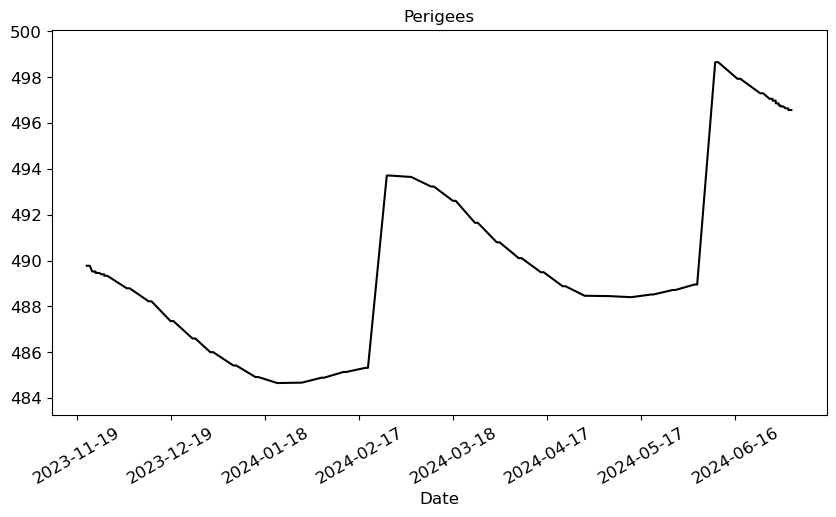

In [5]:
draw_graph(perigees_df, 'Perigees', '', "black")

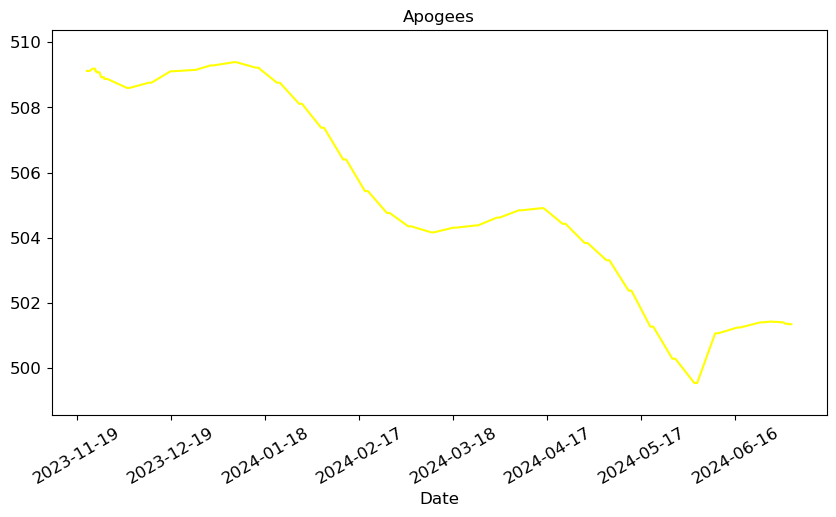

In [6]:
draw_graph(apogees_df, 'Apogees', '', "Yellow")

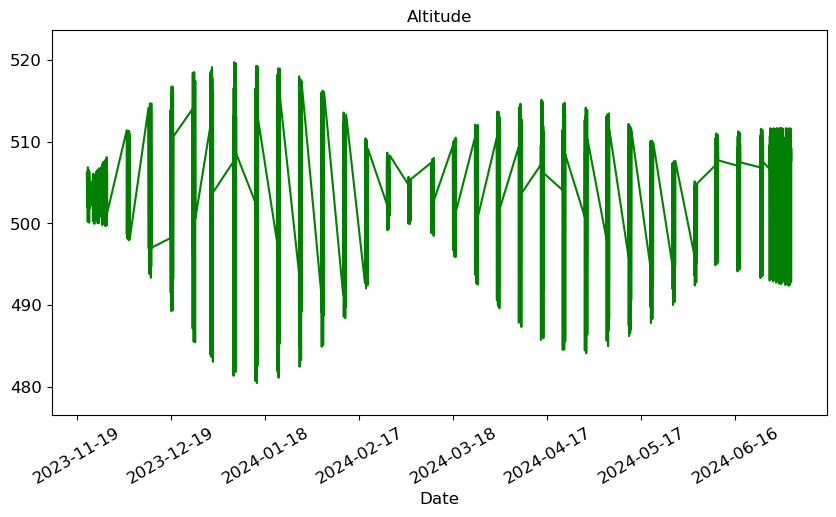

In [7]:
draw_graph(altitude_df, 'Altitude', '', "green")

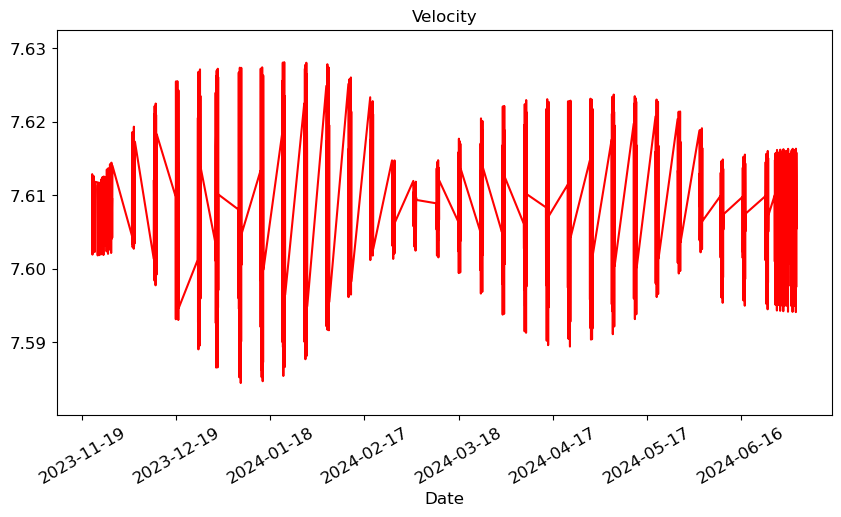

In [8]:
draw_graph(velocity_df, 'Velocity', '', "Red")

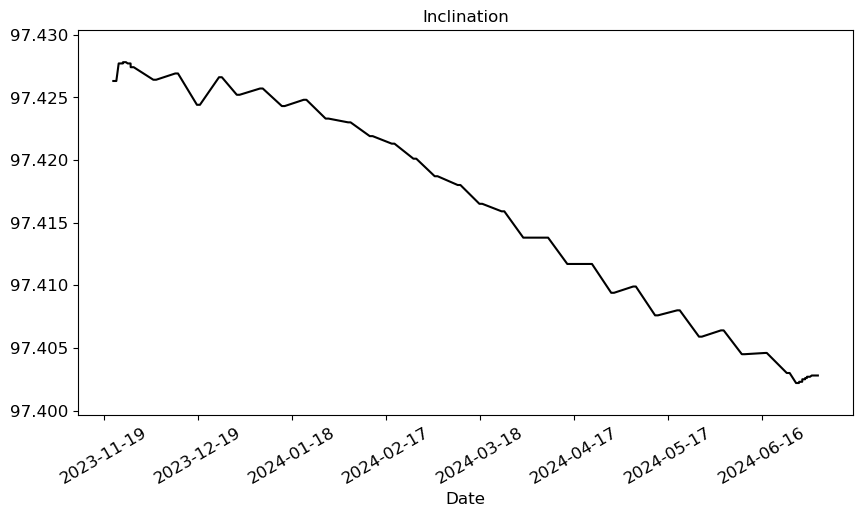

In [9]:
draw_graph(inclinations_df, 'Inclination', '', "Black")

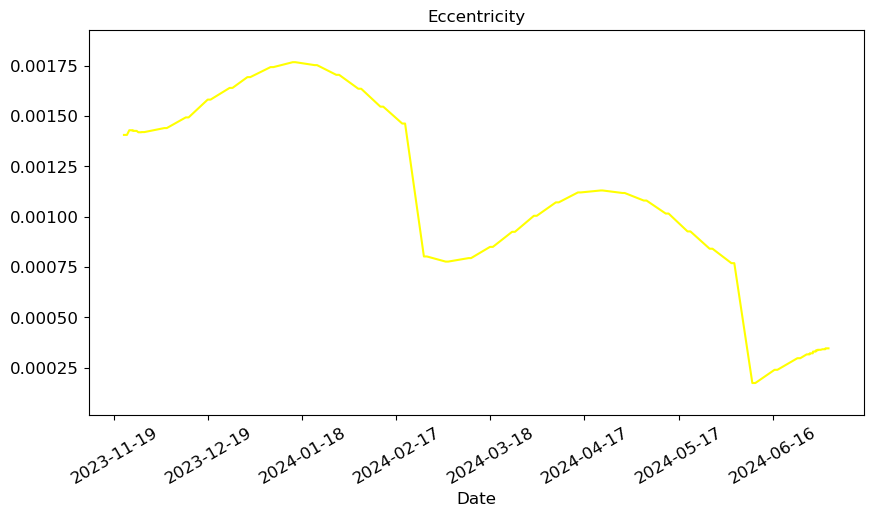

In [10]:
draw_graph(eccentricities_df, 'Eccentricity', '', "Yellow")

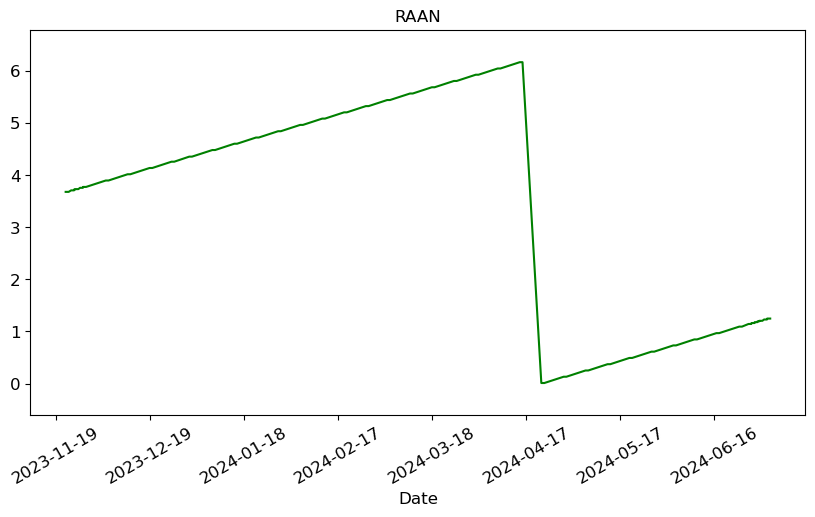

In [11]:
draw_graph(RAANs_df, 'RAAN', '', "Green")

In [13]:
print("Apogees")
print_statistics(apogees_df)
print("Perigees")
print_statistics(perigees_df)
print("Average Altitudes")
print_statistics(altitude_df)
print("Average Velocities")
print_statistics(velocity_df)
print("Inclinations")
print_statistics(inclinations_df)
print("Eccentricities")
print_statistics(eccentricities_df)
print("RAANs")
print_statistics(RAANs_df)
print(perigees_df.idxmax())

Apogees
min: 499.5367362024244
max: 509.3882678326941
average: 505.0697265273829
median: 504.61582758012906
standard deviation: 3.2519010131327777
variance: 10.574860199213987
range: 9.851531630269733

Perigees
min: 484.6597981686965
max: 498.6606967894289
average: 490.5533514910412
median: 489.404875795053
standard deviation: 4.2517500957223495
variance: 18.07737887647501
range: 14.000898620732414

Average Altitudes
min: 480.48444767612546
max: 519.7228483439376
average: 502.63816392577473
median: 503.8960056912156
standard deviation: 8.1733281307139
variance: 66.80329273231916
range: 39.23840066781213

Average Velocities
min: 7.584465238351459
max: 7.628117865254013
average: 7.608696970801086
median: 7.609279038021333
standard deviation: 0.009031932281697509
variance: 8.157580074116956e-05
range: 0.04365262690255367

Inclinations
min: 97.4022
max: 97.4278
average: 97.41569422885573
median: 97.4165
standard deviation: 0.00938422231116971
variance: 8.806362838545535e-05
range: 0.025600